**Decision Tree**  is a graphical representation of all possible solutions to a decision. Tree-based algorithms are the most commonly used algorithms in the case of supervised learning scenarios. They are easier to interpret and visualize with great adaptability.                                   

**Terminologies associated with decision tree:**     

- **Parent node:** In any two connected nodes, the one which is higher hierarchically, is a parent node.        
- **Child node:** In any two connected nodes, the one which is lower hierarchically, is a child node.         
- **Root node:** The starting node from which the tree starts, It has only child nodes. The root node does not have a parent node.                       
- **Leaf Node/leaf:** Nodes at the end of the tree, which do not have any children are leaf nodes or called simply leaf.   
- **Internal nodes/nodes:** All the in-between the root node and the leaf nodes are internal nodes or simply called nodes. Internal nodes have both a parent and at least one child.                 
- **Splitting:** Dividing a node into two or more sun-nodes or adding two or more children to a node.               
- **Decision node:** when a parent splits into two or more children nodes then that node is called a decision node.    
- **Pruning:** When we remove the sub-node of a decision node, it is called pruning. You can understand it as the opposite process of splitting.       
- **Branch/Sub-tree:** a subsection of the entire tree is called a branch or sub-tree.           

**Types of Decision Tree:**   

- **Regression Tree**                     
A regression tree is used when the dependent variable is continuous. The value obtained by leaf nodes in the training data is the mean response of observation falling in that region. Thus, if an unseen data observation falls in that region, its prediction is made with the mean value. This means that even if the dependent variable in training data was continuous, it will only take discrete values in the test set. A regression tree follows a top-down greedy approach.                         
- **Classification Tree**              
A classification tree is used when the dependent variable is categorical. The value obtained by leaf nodes in the training data is the mode response of observation falling in that region It follows a top-down greedy approach.         
  Together they are called as **CART**(Classification And Regression Trees).

**Steps to be followed in making any Machine Learning model:**         

- **Load the dataset**                
- **Clean the dataset (if required)**        
- **Create Train and Test dataset**               
- **Build the model**             
- **Make predictions**                 

# WAP to implement ID3 Algorithm on following dataset:

In [1]:
# Dataset
# |ID  | Fever | Cough | Breathing issues | Infected |           
# | 1  | NO    | NO    | NO               | NO       |             
# | 2  | YES   | YES   | YES              | YES      |           
# | 3  | YES   | YES   | NO               | NO       |            
# | 4  | YES   | NO    | YES              | YES      |            
# | 5  | YES   | YES   | YES              | YES      |             
# | 6  | NO    | YES   | NO               | NO       |           
# | 7  | YES   | NO    | YES              | YES      |       
# | 8  | YES   | NO    | YES              | YES      |        
# | 9  | NO    | YES   | YES              | YES      |             
# | 10 | YES   | YES   | NO               | YES      |           
# | 11 | NO    | YES   | NO               | NO       |           
# | 12 | NO    | YES   | YES              | YES      |           
# | 13 | NO    | YES   | YES              | NO       |           
# | 14 | YES   | YES   | NO               | NO       |

**Information Theory:**            
A less impure node requires less information to describe it and, a more impure node requires more information. Information theory is a measure to define this degree of disorganization in a system known as Entropy. If the sample is completely homogeneous, then the entropy is zero and if the sample is equally divided (50% - 50%), it has an entropy of one.   
Entropy is calculated as follows:  **Entropy = ∑ − (pi\*log2(pi))**                            
         
Steps to calculate entropy for a split:

- Calculate the entropy of the parent node
- Calculate entropy of each individual node of split and calculate the weighted average of all sub-nodes available in the split. The lesser the entropy, the better it is.
- Calculate information gain as follows and chose the node with the highest information gain for splitting.        

Information Gain can be calculated as: **Information gain = 1 - Entropy**

In [2]:
# Importing the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
# Making lists of the given data to form dataset
ID = [1,2,3,4,5,6,7,8,9,10,11,12,13,14]
Fever = ['No','Yes','Yes','Yes','Yes','No','Yes','Yes','No','Yes','No','No','No','Yes']
Cough = ['No','Yes','Yes','No','Yes','Yes','No','No','Yes','Yes','Yes','Yes','Yes','Yes']
BreathingIssues = ['No','Yes','No','Yes','Yes','No','Yes','Yes','Yes','No','No','Yes','Yes','No']
Infected = ['No','Yes','No','Yes','Yes','No','Yes','Yes','Yes','Yes','No','Yes','No','No']

In [4]:
# Creating data frame using Pandas
dataset = {'ID' : ID, 'Fever': Fever , 'Cough' : Cough, 'Breathing_Issues' : BreathingIssues ,'Infected': Infected}
df = pd.DataFrame(dataset, columns = ['ID' , 'Fever' , 'Cough' , 'Breathing_Issues' , 'Infected'])

In [5]:
# Visuaizing the dataset
df

,ID,Fever,Cough,Breathing_Issues,Infected
0,1,No,No,No,No
1,2,Yes,Yes,Yes,Yes
2,3,Yes,Yes,No,No
3,4,Yes,No,Yes,Yes
4,5,Yes,Yes,Yes,Yes
5,6,No,Yes,No,No
6,7,Yes,No,Yes,Yes
7,8,Yes,No,Yes,Yes
8,9,No,Yes,Yes,Yes
9,10,Yes,Yes,No,Yes


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 5 columns):
ID                  14 non-null int64
Fever               14 non-null object
Cough               14 non-null object
Breathing_Issues    14 non-null object
Infected            14 non-null object
dtypes: int64(1), object(4)
memory usage: 688.0+ bytes


In [7]:
# Encoding categorical data using Label Encoder
from sklearn import preprocessing
lableEnc = preprocessing.LabelEncoder()
df['Fever'] = lableEnc.fit_transform(df['Fever'])
df['Cough'] = lableEnc.fit_transform(df['Cough'])
df['Breathing_Issues'] = lableEnc.fit_transform(df['Breathing_Issues'])
df['Infected'] = lableEnc.fit_transform(df['Infected'])

In [8]:
# Visualizing the encoded dataset
df

,ID,Fever,Cough,Breathing_Issues,Infected
0,1,0,0,0,0
1,2,1,1,1,1
2,3,1,1,0,0
3,4,1,0,1,1
4,5,1,1,1,1
5,6,0,1,0,0
6,7,1,0,1,1
7,8,1,0,1,1
8,9,0,1,1,1
9,10,1,1,0,1


In [9]:
# Importing Libraries for implementing decision trees
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree 
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.tree import plot_tree

In [10]:
# Separating the Dependent and Independent variables
X = df.iloc[:, 0:4]
Y = df.loc[:, 'Infected']

In [11]:
# Partitioning the dataframe into training and testing data
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.25, random_state = 1)

In [12]:
#In order to tune the max-depth of out model, we will test the model for different values of max_depth
scores_id3 = []
for i in range(1,3):
    dtree_test = DecisionTreeClassifier(criterion='entropy',max_depth=i)
    dtree_test.fit(X_train,Y_train)
    scores_id3.append(dtree_test.score(X_test,Y_test))
print(scores_id3)
print(max(scores_id3))

[1.0, 1.0]
1.0


From the above scores list, we can see that the accuracy obtained at all depths is same. Hence,  we take max-depth = 2 and train our model for this depth

In [13]:
# Making classifier
model_id3 = DecisionTreeClassifier(criterion='entropy' , max_depth=2)

In [14]:
# Training the classifier
model_id3.fit(X_train, Y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=2,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [15]:
# Prediction on the training and testing data
pred_id3 = model_id3.predict(X_test)
print("Training Score: ",model_id3.score(X_train,Y_train))
print("Test Score: ",model_id3.score(X_test,Y_test))

# Calculate percentage accuracy of the model
print ("Hence, percentage accuracy found on test data:", round(accuracy_score(Y_test, pred_id3)*100 , 2),"%")

Training Score:  0.9
Test Score:  1.0
Hence, percentage accuracy found on test data: 100.0 %


In [16]:
# Printing the confusion matrix for the above classification
confusion_matrix(Y_test,pred_id3)

array([[1, 0],
       [0, 3]], dtype=int64)

In [17]:
# Printing the classification report consisting of precision, recall, f1-score and support
print(classification_report(Y_test,pred_id3))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         3

    accuracy                           1.00         4
   macro avg       1.00      1.00      1.00         4
weighted avg       1.00      1.00      1.00         4



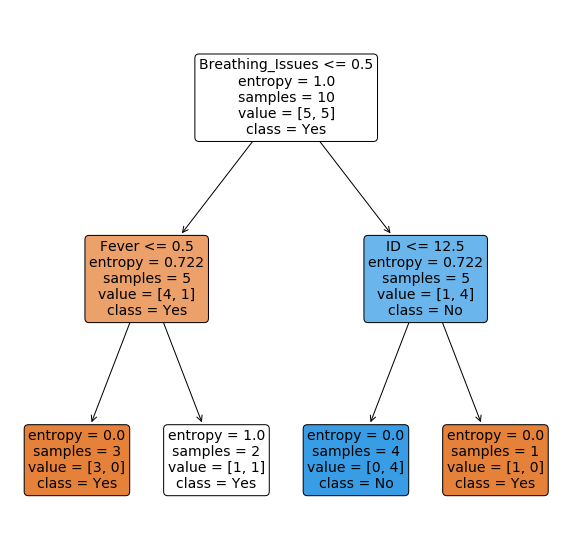

In [18]:
# Visualize the tree by plotting
plt.figure(figsize=(10,10))
id3_tree = plot_tree(model_id3,feature_names=X.columns,class_names=["Yes","No"],filled=True,rounded=True,fontsize=14)

# WAP to implement Decision Tree using CART on https://www.kaggle.com/uciml/pima-indians-diabetes-database dataset.

**Gini impurity**                       
Gini says, if we select two items from a population at random then they must be of the same class and the probability for this is 1 if the population is pure.                   

- It works with the categorical target variable “Success” or “Failure”.        
- It performs only Binary splits.                              
- Higher the value of Gini higher the homogeneity.                                          
- CART (Classification and Regression Tree) uses the Gini method to create binary splits.             

Steps to Calculate Gini impurity for a split:

- Calculate Gini impurity for sub-nodes, using the formula subtracting the sum of the square of probability for success and failure from one.                    
**Gini Impurity: 1 - (p²+q²),** where p =P(Success) & q=P(Failure)                      
- Calculate Gini for split using the weighted Gini score of each node of that split.                 
- Select the feature with the least Gini impurity for the split.                           

In [19]:
# Loading the dataset from directory to Pandas Dataframe
diab_df = pd.read_csv('diabetes.csv')
diab_df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.                    

The datasets consists of several medical predictor variables and one target variable, Outcome. Predictor variables includes the number of pregnancies the patient has had, their BMI, insulin level, age, and so on.               

In [20]:
diab_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [21]:
# Checking for NULL Values
null_columns = diab_df.columns[diab_df.isnull().any()]
print(diab_df[null_columns].isnull().sum())

Series([], dtype: float64)


In [22]:
# Separating the Dependent and Independent variables
X = diab_df.iloc[:,0:8]
Y = diab_df.loc[: , 'Outcome']

In [23]:
# Partitioning the dataframe into training and testing data
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.3)
# X_train.shape
# X_test.shape
# Y_train.shape
# Y_test.shape

In [24]:
#In order to tune the max-depth of out model, we will test the model for different values of max_depth
scores_gini = []
for i in range(2,8):
    dtree_test = DecisionTreeClassifier(criterion='gini',max_depth=i)
    dtree_test.fit(X_train,Y_train)
    scores_gini.append(dtree_test.score(X_test,Y_test))
print(scores_gini)
print(max(scores_gini))

[0.7142857142857143, 0.7662337662337663, 0.7316017316017316, 0.7402597402597403, 0.7402597402597403, 0.7359307359307359]
0.7662337662337663


From the above scores list, we can see that the maximum accuracy is obtained at max-depth = 2  and then it starts decreasing. Hence, we take max-depth = 2 and train our model for this depth

In [25]:
# Training the model
model_gini = DecisionTreeClassifier(max_depth = 2)
model_gini.fit(X_train, Y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [26]:
# Prediction on the training and testing data
pred_gini = model_gini.predict(X_test)
print("Training Score: ",model_gini.score(X_train,Y_train))
print("Test Score: ",model_gini.score(X_test,Y_test))

# Calculate percentage accuracy of the model
print ("Hence, percentage accuracy found on test data:", round(accuracy_score(Y_test, pred_gini)*100 , 2),"%")

Training Score:  0.74487895716946
Test Score:  0.7142857142857143
Hence, percentage accuracy found on test data: 71.43 %


In [27]:
# Printing the confusion matrix for the above classification
confusion_matrix(Y_test,pred_gini)

array([[110,  43],
       [ 23,  55]], dtype=int64)

In [28]:
# Printing the classification report consisting of precision, recall, f1-score and support
print(classification_report(Y_test,pred_gini))

              precision    recall  f1-score   support

           0       0.83      0.72      0.77       153
           1       0.56      0.71      0.62        78

    accuracy                           0.71       231
   macro avg       0.69      0.71      0.70       231
weighted avg       0.74      0.71      0.72       231



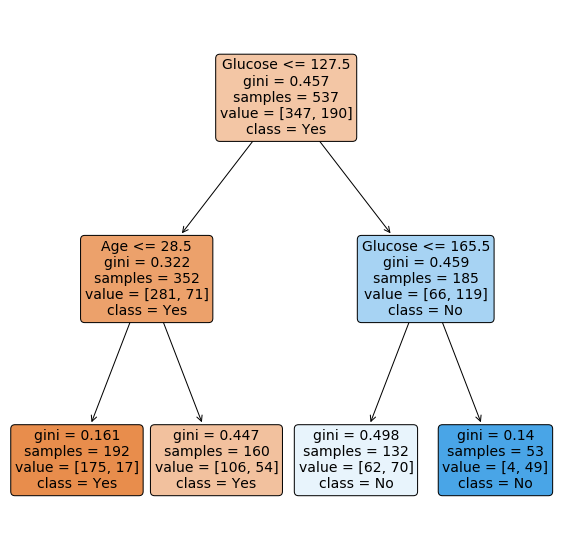

In [29]:
# Visualize the tree by plotting
plt.figure(figsize=(10,10))
gini_tree = plot_tree(model_gini,feature_names=X.columns,class_names=["Yes","No"],filled=True,rounded=True,fontsize=14)

**End of Notebook**